# 运用kNN进行色彩风格迁移

效果：
![result](https://i.loli.net/2019/10/19/dkEmNW18HfTlDrn.png)

## 如何表示色彩？

### RGB
![rgb](https://i.loli.net/2019/10/19/AK6DzCYZ9bcJ4iE.png)

![](https://i.loli.net/2019/10/19/1LOK9N7yWDksGZb.png)

### Lab
![](https://i.loli.net/2019/10/19/UmNlP8IwYehzfRc.png)

这样就可以把亮度信息和色彩信息区分开

## 从黑白到彩色的映射
![](https://i.loli.net/2019/10/19/gLQ5GNkFUwsMCAu.png)


## kNN算法

![](https://i.loli.net/2019/10/19/wbn74ayeKdOCxm1.png)

![](https://i.loli.net/2019/10/19/7edtTIr5lwvSBy3.png)



接下来我们来看看具体的代码实现。首先，导入所需的库和函数。

*   numpy，⽤于处理各种数值计算
*   skimage，⽤于读⼊、保存图⽚以及RGB模式和Lab模式的相互转化
*   sklearn，提供K近邻算法的接⼝



In [1]:
# 支持向量和矩阵运算的库
import numpy as np

# 图片输入输出
from skimage import io

# 图片格式转换
from skimage.color import rgb2lab, lab2rgb

# KNN模型
from sklearn.neighbors import KNeighborsRegressor

# 系统命令
import os

# 绘图
import matplotlib.pyplot as plt

# 文件夹前缀
dir_prefix = "../input/knn-styletransfer/"

00006.jpg


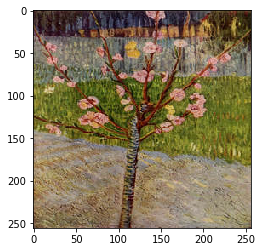

00010.jpg


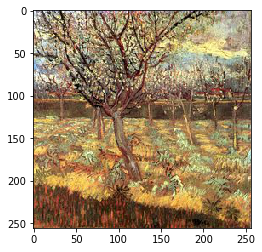

00008.jpg


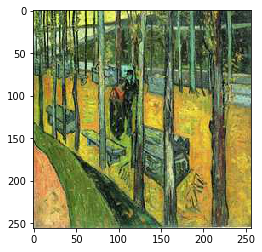

00004.jpg


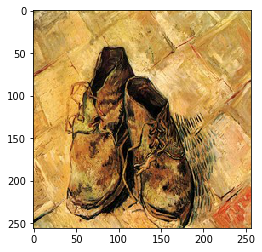

00003.jpg


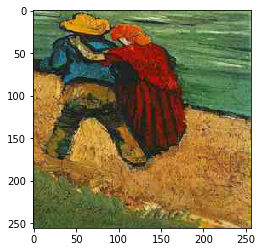

00009.jpg


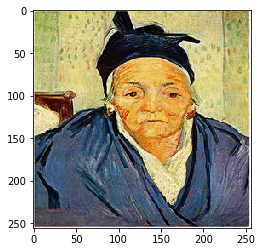

00005.jpg


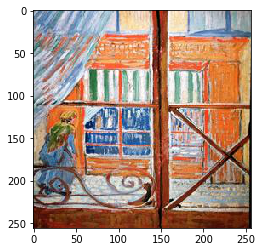

00007.jpg


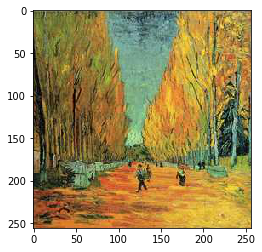

00002.jpg


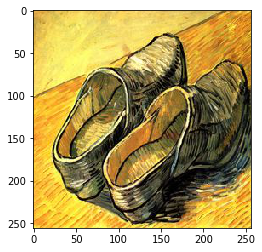

00001.jpg


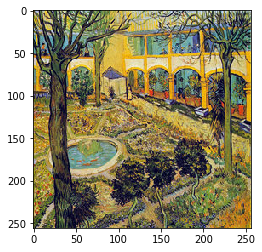

In [2]:
data_dir = dir_prefix + "vangogh-style/"
# os.listdir(data_dir)
for file in os.listdir(data_dir):
    print(file)
    img = io.imread(os.path.join(data_dir, file))
    plt.imshow(img)
    plt.show()

读入图像，返回图像中所有$3 \times 3$灰度矩阵到中心点色彩值的映射关系。

In [3]:
# block_size即从像素点向外扩展几层像素，扩展1层即3*3
block_size = 1

# 读入风格图像, 得到映射 X -> Y
# X: 储存3*3像素格的灰度值
# Y: 储存中心像素格的色彩值
def read_style_image(file_name, size=block_size):
    # --------------------------------------------------------------------------
    # io.imread:
    # 输入一个图片文件，从中读取图片并保存成rgb格式，即3个M*N的矩阵，输出这个张量（M*N*3的列表）
    # https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread
    # --------------------------------------------------------------------------
    img = io.imread(file_name)
    # print(img)
    # print(img.shape)
    plt.imshow(img)
    plt.show()
    
    # --------------------------------------------------------------------------
    # rgb2lab:
    # 输入一张rgb格式的图片对应的张量（M*N*3的列表），将其转成lab格式，输出转换后的张量（M*N*3的列表）
    # https://scikit-image.org/docs/dev/api/skimage.color.html?highlight=rgb2lab#skimage.color.rgb2lab
    # --------------------------------------------------------------------------
    img = rgb2lab(img)
    # plt.imshow(img)
    # plt.show()
    
    # 取出图片的宽度和高度，img.shape可以得到图片的维度列表，取列表前两位，即M和N
    w, h = img.shape[:2]
    # print(img.shape[:])
    
    # 初始化函数的输出，即两个列表X和Y，表示3*3灰度矩阵（X）到中心点色彩值（Y）的映射
    X = []
    Y = []
    
    # 用for循环枚举图像中的全部可能的中心点，因为需要从中心点向外扩展1层，所以枚举范围从(0, w)变成(1, w - 1)
    for x in range(size, w - size):
        for y in range(size, h - size):
            # ------------------------------------------------------------------
            # 枚举好中心点位置，即坐标(x, y)后，分别求该中心点对应的3*3灰度矩阵（X）和中心点色彩值（Y）
            #
            # 从中心点向外扩一圈，得到一个3*3矩阵，用[x - size : x + size + 1, y - size : y + size + 1]取到这个矩阵
            # 并在第三个维度上取值为0，即l通道对应的灰度值
            #
            # array.reshape():
            # 将目标array调整成所需的维度形状，-1表示某一位缺省，可由其他维度推理得到
            # https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
            # ------------------------------------------------------------------
            X.append(img[x - size : x + size + 1, y - size : y + size + 1, 0].reshape(-1))
            
            # 取出中心点对应的色彩值，即在第三个维度上去值为1和2，即ab通道对应的色彩值
            Y.append(img[x, y, 1:])
    print("finish reading " + file_name)
    return X, Y

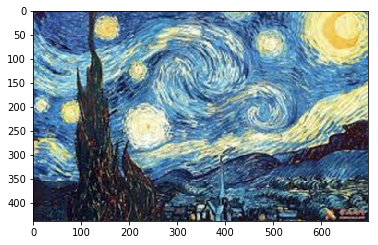

finish reading ../input/knn-styletransfer/kNNstyle.jpg


In [4]:
# 风格图像路径
style_data = dir_prefix + "kNNstyle.jpg"

# 读取风格图像，构建KNN映射数据集
X, Y = read_style_image(style_data)

读取若风格图像构建数据集。

reading data
reading 00006.jpg


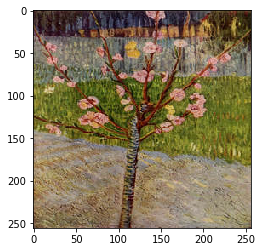

finish reading ../input/knn-styletransfer/vangogh-style/00006.jpg
reading 00010.jpg


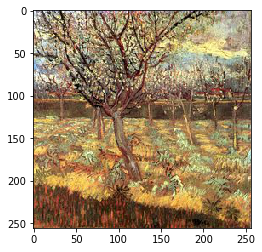

finish reading ../input/knn-styletransfer/vangogh-style/00010.jpg
reading 00008.jpg


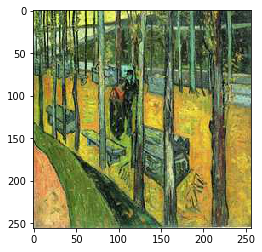

finish reading ../input/knn-styletransfer/vangogh-style/00008.jpg
reading 00004.jpg


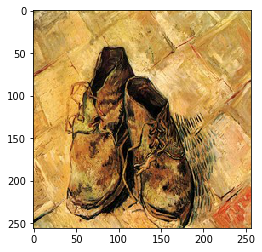

finish reading ../input/knn-styletransfer/vangogh-style/00004.jpg
reading 00003.jpg


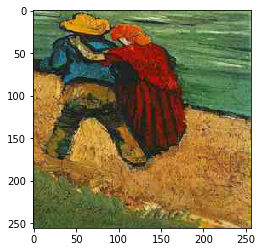

finish reading ../input/knn-styletransfer/vangogh-style/00003.jpg
reading 00009.jpg


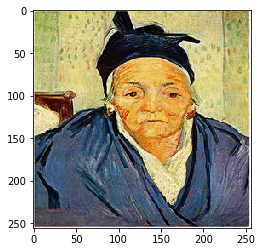

finish reading ../input/knn-styletransfer/vangogh-style/00009.jpg
reading 00005.jpg


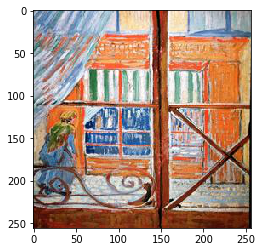

finish reading ../input/knn-styletransfer/vangogh-style/00005.jpg
reading 00007.jpg


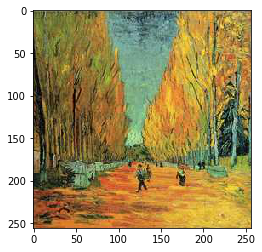

finish reading ../input/knn-styletransfer/vangogh-style/00007.jpg
reading 00002.jpg


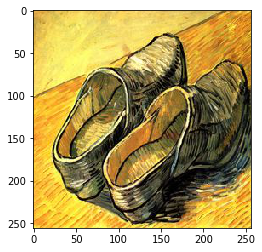

finish reading ../input/knn-styletransfer/vangogh-style/00002.jpg
reading 00001.jpg


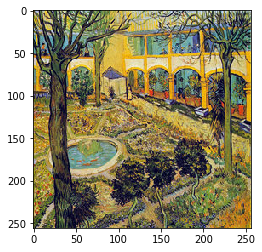

finish reading ../input/knn-styletransfer/vangogh-style/00001.jpg
finish reading


In [5]:

# 风格图像文件夹路径
style_data_dir = dir_prefix + "vangogh-style/"
# 读取风格图像文件夹中的number张图像，这里number=1
# 输出由风格图像构建的映射数据集
def create_dataset(data_dir=style_data_dir, number=5):
    # 初始化函数输出
    X = []
    Y = []
    n = 0
    # print(os.listdir(data_dir))
    for file in os.listdir(data_dir):
        print("reading", file)
        X0, Y0 = read_style_image(os.path.join(data_dir, file))
        X.extend(X0)
        Y.extend(Y0)
        n += 1
        if n >= number:
            break
    return X, Y


# 调用构建映射数据集的函数
print("reading data")
X, Y = create_dataset(number=10)
print("finish reading")

建立kNN模型，设置k=4，即预测的色彩值是与其最近的4个点的色彩值的加权平均，其权重与距离的倒数成正比。

In [6]:
# 初始化kNN模型，将邻居数设为4
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
nbrs = KNeighborsRegressor(n_neighbors=4, weights='distance')

print("start fitting")

# 用X和Y构建kNN模型
nbrs.fit(X, Y)
print("finish fitting")

start fitting
finish fitting


处理内容图片得到若干$3 \times 3$的灰度矩阵。

In [7]:
# 整段填空
def split_origin_image(img, size=block_size):
    w, h = img.shape[:2]
    X = []
    for x in range(size, w - size):
        for y in range(size, h - size):
            X.append(img[x - size : x + size + 1, y - size : y + size + 1, 0].reshape(-1))
    return X

根据kNN算法得到色彩风格迁移后的图像。

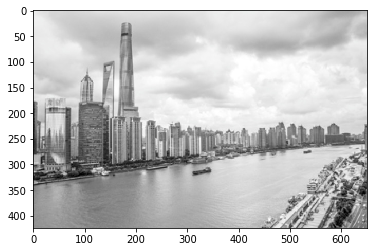

(424, 650, 3)
start predicting
(273456, 2)
finish predicting


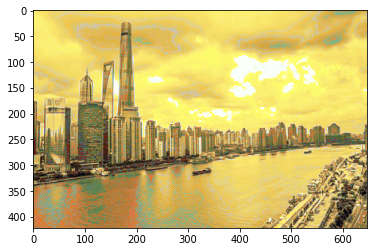

(422, 648, 3)


In [8]:
# 输入内容图像，根据已经建立好的kNN模型，输出色彩风格迁移后的图像。
def rebuild(file_name, size=block_size):
    img = io.imread(file_name)
    # 打印内容图像
    plt.imshow(img)
    plt.show()
    print(img.shape)
    
    img = rgb2lab(img)
    w, h = img.shape[:2]
    
    # 初始化输出图像对应的张量
    photo = np.zeros([w, h, 3])
    
    # 取出内容图像的全部3*3灰度矩阵
    X = split_origin_image(img)
    
    print("start predicting")
    # 调用kNN模型的predict方法，对于输入的一系列3*3灰度矩阵X，求得其各自对应的色彩的回归值
    # 调用reshape方法将输出的色彩值调整到图片对应的维度
    p_ab = nbrs.predict(X)
    print(p_ab.shape)
    p_ab = p_ab.reshape(w - 2 * size, h - 2 * size, -1)
    print("finish predicting")
    
    # 枚举输出图像的每个像素，最外圈无法作为中心点，因此不赋值（黑框？）
    for x in range(size, w - size):
        for y in range(size, h - size):
            # 分别对输出图像的3个通道赋值
            photo[x, y, 0] = img[x, y, 0]
            
            # 后两个通道的值p_ab是从0开始的，所以坐标需要向左上偏移1个像素
            photo[x, y, 1] = p_ab[x - size, y - size, 0]
            photo[x, y, 2] = p_ab[x - size, y - size, 1]
    
    photo = photo[size : w - size, size : h - size, :]
    return photo

# 内容图像路径
input_path = dir_prefix + "input.jpg"

# 生成图像
new_photo = rebuild(input_path)

# 输出图像路径
output_path = "output.jpg"

# 保存输出图像
io.imsave(output_path, lab2rgb(new_photo))

# 打印输出图像
plt.imshow(lab2rgb(new_photo))
plt.show()
print(new_photo.shape)